<img src="https://github.com/djp840/MSDS_458_Public/blob/master/images/NorthwesternHeader.png?raw=1">

In [535]:
from scipy import stats as st

In [536]:

import scikitplot as skplt

from matplotlib import pyplot as plt
import seaborn as sns


In [537]:
from sklearn.metrics import classification_report

## MSDS422 Assignment 03:

<div class="alert alert-block alert-success">
    <b>More Technical</b>: Throughout the notebook. This types of boxes provide more technical details and extra references about what you are seeing. They contain helpful tips, but you can safely skip them the first time you run through the code.
</div>

### Data Dictionary Titanic Dataset


<br>
   
| Variable        | Description                        |  Details                  |  
| :---            |    :----:                          |     :----:                |   
| Survival        | Survival                           | 0 = No; 1 = Yes           |    
| pclass          | Passenger Class                    | 1 = 1st; 2 = 2nd; 3 = 3rd |     
| name            | First and Last Name                |                           |
| sex             | Sex                                |                           |	 
| age             | Age                                |                           | 	 
| sibsp 	  | Number of Siblings/Spouses Aboard  |                           | 	 
| parch           | Number of Parents/Children Aboard  |                           |
| ticket 	  | Ticket Number 	               |                           |
| fare 	          | Passenger Fare 	               |                           |
| cabin 	  | Cabin 	                       |                           | 
| embarked 	  | Port of Embarkation 	       |C = Cherbourg; Q = Queenstown; S = Southampton |
    

## Import packages 



In [538]:
import numpy as np 
import pandas as pd 

import statsmodels.formula.api as sm
#from xgboost import XGBClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score, roc_curve 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

import scikitplot as skplt
import seaborn as sns
from matplotlib import pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set(style="whitegrid", color_codes=True)
plt.rc("font", size=14)

In [539]:
%matplotlib inline

<div class="alert alert-block alert-info">
    <b>Suppress warning messages</b></div>

In [540]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

### Load Data (Local Directory)

In [541]:
training_df = pd.read_csv("Titanic_train.csv")
test_df = pd.read_csv("Titanic_test.csv")

### Data Quality Review 

In [542]:
print("Shape:", training_df.shape,"\n")
print("Variable Types:") 
print(training_df.dtypes)

Shape: (891, 12) 

Variable Types:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [543]:
print("Shape:", test_df.shape,"\n")
print("Variable Types:") 
print(test_df.dtypes)

Shape: (418, 11) 

Variable Types:
PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [1]:
training_df.head()

NameError: name 'training_df' is not defined

## Exploritory Data Analysis (EDA) 

### Review Training and Test Dataset for Missing Values

In [545]:
training_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [546]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<div class="alert alert-block alert-warning">
Attention to the <b>count</b> row for each column number of records
</div> 

In [547]:
training_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#corss tab

In [548]:
ct=pd.crosstab(training_df['Survived'], columns= [training_df['Embarked'],training_df['Sex']])
ct

Embarked      C           Q           S     
Sex      female male female male female male
Survived                                    
0             9   66      9   38     63  364
1            64   29     27    3    140   77

In [549]:
ctp=pd.crosstab(index=training_df['Survived'], columns= [training_df['Embarked'],training_df['Sex']], normalize ='index')
round(ctp,2)

Embarked      C            Q            S      
Sex      female  male female  male female  male
Survived                                       
0          0.02  0.12   0.02  0.07   0.11  0.66
1          0.19  0.09   0.08  0.01   0.41  0.23

In [550]:
pd.crosstab(training_df['Survived'], columns= [training_df['Pclass']])

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


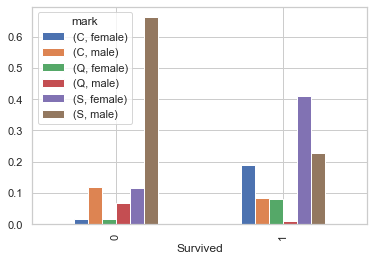

In [551]:
ctp.plot.bar(stacked=False)
plt.legend(title='mark')

plt.show()

In [552]:
pd.crosstab(training_df['Survived'], columns= [training_df['Embarked']])


Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


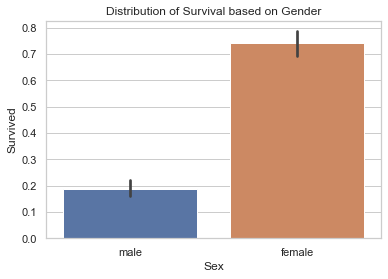

Total people survived is: 342
Proportion of Females who survived:
0.6812865497076024
Proportion of Males who survived:
0.31871345029239767


In [553]:
sns.barplot(x="Sex", y="Survived", data=training_df)
plt.title("Distribution of Survival based on Gender")
plt.show()

total_survived_females = training_df[training_df.Sex == "female"]["Survived"].sum()
total_survived_males = training_df[training_df.Sex == "male"]["Survived"].sum()

print("Total people survived is: " + str((total_survived_females + total_survived_males)))
print("Proportion of Females who survived:") 
print(total_survived_females/(total_survived_females + total_survived_males))
print("Proportion of Males who survived:")
print(total_survived_males/(total_survived_females + total_survived_males))

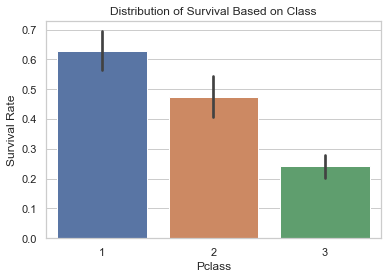

Total people survived is: 342
Proportion of Class 1 Passengers who survived:
0.39766081871345027
Proportion of Class 2 Passengers who survived:
0.2543859649122807
Proportion of Class 3 Passengers who survived:
0.347953216374269


In [554]:
sns.barplot(x="Pclass", y="Survived", data=training_df)
plt.ylabel("Survival Rate")
plt.title("Distribution of Survival Based on Class")
plt.show()

total_survived_one = training_df[training_df.Pclass == 1]["Survived"].sum()
total_survived_two = training_df[training_df.Pclass == 2]["Survived"].sum()
total_survived_three = training_df[training_df.Pclass == 3]["Survived"].sum()
total_survived_class = total_survived_one + total_survived_two + total_survived_three

print("Total people survived is: " + str(total_survived_class))
print("Proportion of Class 1 Passengers who survived:") 
print(total_survived_one/total_survived_class)
print("Proportion of Class 2 Passengers who survived:")
print(total_survived_two/total_survived_class)
print("Proportion of Class 3 Passengers who survived:")
print(total_survived_three/total_survived_class)

Text(0.5, 1.0, 'Survival Rates Based on Gender and Class')

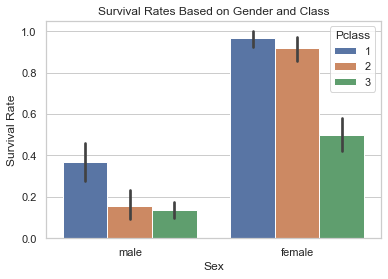

In [555]:
sns.barplot(x="Sex", y="Survived", hue="Pclass", data=training_df)
plt.ylabel("Survival Rate")
plt.title("Survival Rates Based on Gender and Class")

### Correlation Heatmap

<div class="alert alert-block alert-info">
<b>Seaborn Heatmap Documentation</b><br>
https://seaborn.pydata.org/generated/seaborn.heatmap.html
</div>

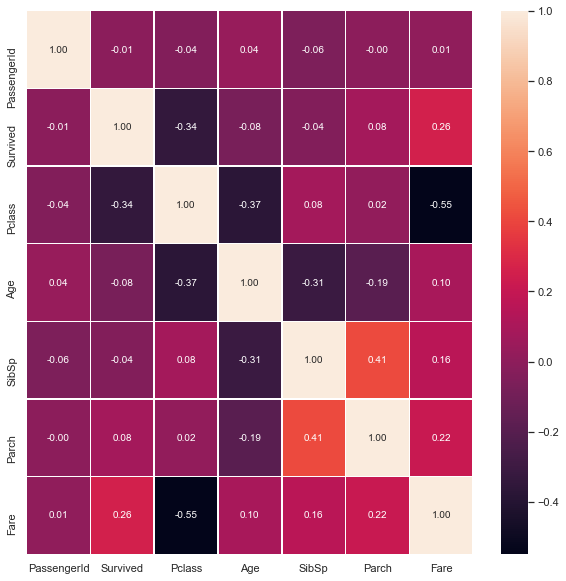

In [556]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(training_df.corr(), annot=True, linewidths=0.5, fmt= '.2f',ax=ax)

## Preprocess Data for Analysis

### Fix Missing Values, Feature  Engineering

#### Encode Gender Male = 1, Female = 0

In [557]:
sex_map={"male":1,"female":0}
training_df["Sex"]=training_df["Sex"].map(sex_map)
test_df["Sex"]=test_df["Sex"].map(sex_map)

In [558]:
training_df["Sex"].head()

0    1
1    0
2    0
3    0
4    1
Name: Sex, dtype: int64

Passenger Class<b> (Pclass)</b> and Number of Siblings<b> (SibSp)</b> provide insights into the social-economic status differences. The <b>Age</b> of the passenger will be imputed by median age of each sub-group

### Training Dataset

In [559]:
training_df1=training_df.groupby(["Pclass","SibSp"])
training_df1_median=training_df1.median()
training_df1_median

PassengerId  Survived  Sex   Age  Parch      Fare
Pclass SibSp                                                   
1      0            476.0       1.0  1.0  37.0    0.0   39.6000
       1            485.0       1.0  0.0  38.0    0.0   79.2000
       2            572.0       1.0  0.0  44.0    0.0  133.6500
       3             89.0       1.0  0.0  23.0    2.0  263.0000
2      0            407.0       0.0  1.0  30.0    0.0   13.0000
       1            451.0       1.0  0.0  29.0    1.0   26.0000
       2            565.5       0.5  1.0  23.5    1.0   39.0000
       3            727.0       1.0  0.0  30.0    0.0   21.0000
3      0            472.0       0.0  1.0  26.0    0.0    7.8958
       1            372.0       0.0  1.0  25.0    0.0   15.5500
       2            334.0       0.0  1.0  19.5    0.0   19.2583
       3            302.5       0.0  0.0   6.0    1.0   25.4667
       4            264.5       0.0  1.0   6.5    1.5   31.2750
       5            387.0       0.0  1.0  11.0    2.0   46.9000
       8            325.0       0.0  1.0   NaN    2.0   69.5500

### Test Dataset

In [560]:
test_df1=test_df.groupby(["Pclass","SibSp"])
test_df1_median=test_df1.median()
test_df1_median

PassengerId  Sex   Age  Parch       Fare
Pclass SibSp                                          
1      0           1088.0  1.0  39.0    0.0   42.50000
       1           1109.5  0.5  46.0    0.0   82.06250
       2            969.0  0.0  55.0    0.0   51.47920
       3            945.0  0.0  28.0    2.0  263.00000
2      0           1117.5  1.0  27.0    0.0   13.00000
       1           1139.0  1.0  29.0    0.0   26.00000
       2           1077.5  0.5  21.0    0.5   31.50000
3      0           1095.5  1.0  24.0    0.0    7.82920
       1           1084.0  0.0  20.0    1.0   15.24580
       2           1059.0  1.0  19.5    0.0   21.67920
       3           1281.0  1.0  29.0    1.0   21.07500
       4           1076.0  1.0  11.5    2.0   30.25625
       5           1032.0  0.0  10.0    2.0   46.90000
       8           1166.0  0.5  14.5    2.0   69.55000

### Function - Impute Age

In [561]:
def impute_age(dataset,dataset_med):
    for x in range(len(dataset)):
        if dataset["Pclass"][x]==1:
            if dataset["SibSp"][x]==0:
                return dataset_med.loc[1,0]["Age"]
            elif dataset["SibSp"][x]==1:
                return dataset_med.loc[1,1]["Age"]
            elif dataset["SibSp"][x]==2:
                return dataset_med.loc[1,2]["Age"]
            elif dataset["SibSp"][x]==3:
                return dataset_med.loc[1,3]["Age"]
        elif dataset["Pclass"][x]==2:
            if dataset["SibSp"][x]==0:
                return dataset_med.loc[2,0]["Age"]
            elif dataset["SibSp"][x]==1:
                return dataset_med.loc[2,1]["Age"]
            elif dataset["SibSp"][x]==2:
                return dataset_med.loc[2,2]["Age"]
            elif dataset["SibSp"][x]==3:
                return dataset_med.loc[2,3]["Age"]
        elif dataset["Pclass"][x]==3:
            if dataset["SibSp"][x]==0:
                return dataset_med.loc[3,0]["Age"]
            elif dataset["SibSp"][x]==1:
                return dataset_med.loc[3,1]["Age"]
            elif dataset["SibSp"][x]==2:
                return dataset_med.loc[3,2]["Age"]
            elif dataset["SibSp"][x]==3:
                return dataset_med.loc[3,3]["Age"]
            elif dataset["SibSp"][x]==4:
                return dataset_med.loc[3,4]["Age"]
            elif dataset["SibSp"][x]==5:
                return dataset_med.loc[3,5]["Age"]
            elif dataset["SibSp"][x]==8:
                return dataset_med.loc[3]["Age"].median() 

In [562]:
training_df["Age"]=training_df["Age"].fillna(impute_age(training_df,training_df1_median))
test_df["Age"]=test_df["Age"].fillna(impute_age(test_df,test_df1_median))

In [563]:
print(training_df.isnull().sum()), print(test_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


(None, None)

### Fix Missing Values Cabin

Missing Values will be filled by "U" = Unknown

In [564]:
training_df["Cabin"]=training_df["Cabin"].fillna("U")
test_df["Cabin"]=test_df["Cabin"].fillna("U")
training_df["Cabin"]=training_df["Cabin"].map(lambda x: x[0])
test_df["Cabin"]=test_df["Cabin"].map(lambda x: x[0])

In [565]:
training_df["Cabin"].head()

0    U
1    C
2    U
3    C
4    U
Name: Cabin, dtype: object

In [566]:
training_df["Cabin"].value_counts()

U    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [567]:
training_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,U,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,U,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,U,S


In [568]:
training_df.shape

(891, 12)

In [569]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


In [570]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        418 non-null    object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 36.0+ KB


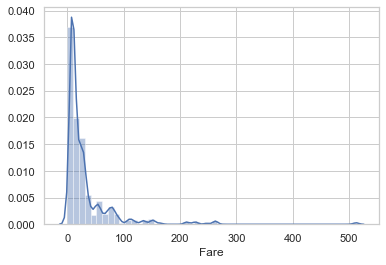

In [571]:
sns.distplot((training_df['Fare']))


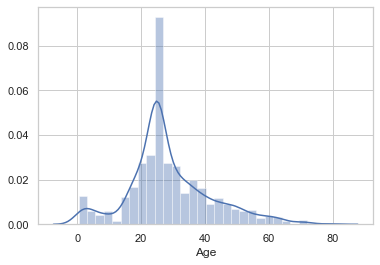

In [572]:
sns.distplot((training_df['Age']))

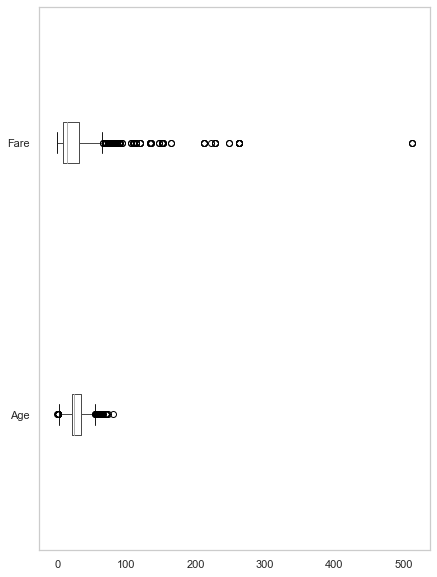

In [573]:
training_df[['Age','Fare']].boxplot(vert=False, figsize=(7,10), grid=False)

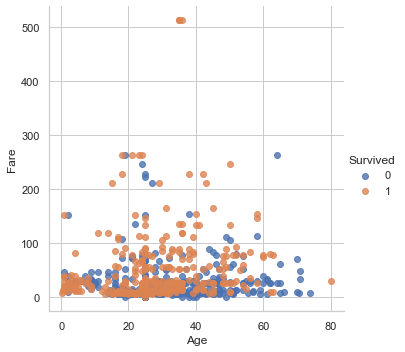

In [574]:
sns.lmplot(data = training_df, x = 'Age', y = 'Fare', fit_reg=False, hue='Survived')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000285C643E730>,
      dtype=object)

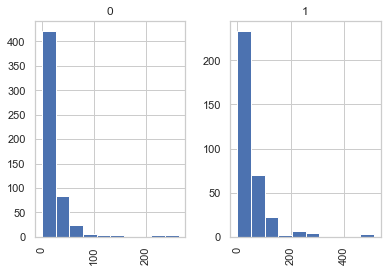

In [575]:
training_df.hist(column= 'Fare',by = 'Survived', stacked= True,)

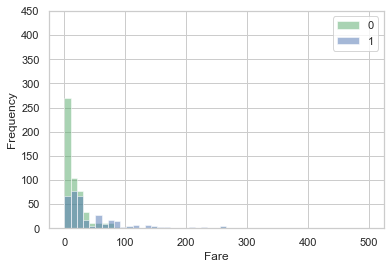

In [576]:
binss = np.linspace(0,500)
plt.hist(training_df[training_df['Survived']==0]['Fare'], bins=binss, alpha = 0.5, label='0',color='g')
plt.hist(training_df[training_df['Survived']==1]['Fare'], bins=binss, alpha = 0.5, label='1', color='b' )
plt.legend(loc='upper right')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.yticks([0,50,100,150,200,250,300,350,400,450])
plt.show()

Text(0, 0.5, 'Frequency')

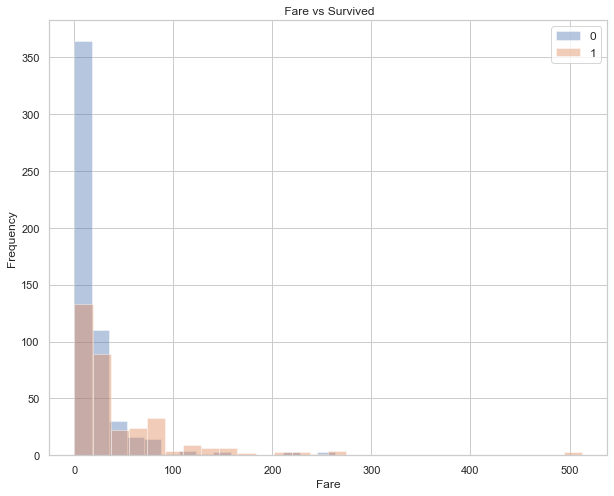

In [577]:
# Fare vs Survived
plt.figure(figsize=(10,8))
df = training_df[training_df['Survived']==0]
sns.distplot(df['Fare'], bins=15,kde= False, label='0')
df = training_df[training_df['Survived']==1]
sns.distplot(df['Fare'],bins=28, kde= False, label='1')
plt.legend(prop={'size': 12})
plt.title(" Fare vs Survived")
plt.xlabel('Fare')
plt.ylabel('Frequency')


Text(0, 0.5, 'Frequency')

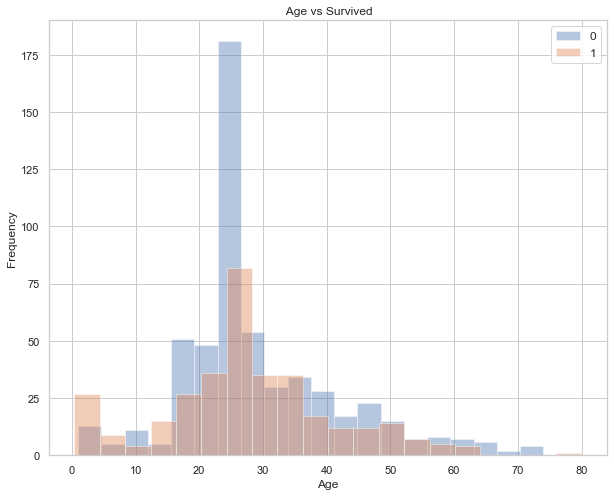

In [578]:
# Fare vs Survived
plt.figure(figsize=(10,8))
df = training_df[training_df['Survived']==0]
sns.distplot(df['Age'], bins=20,kde= False, label='0')
df = training_df[training_df['Survived']==1]
sns.distplot(df['Age'],bins=20, kde= False, label='1')
plt.legend(prop={'size': 12})
plt.title(" Age vs Survived")
plt.xlabel('Age')
plt.ylabel('Frequency')


Text(0, 0.5, 'Frequency')

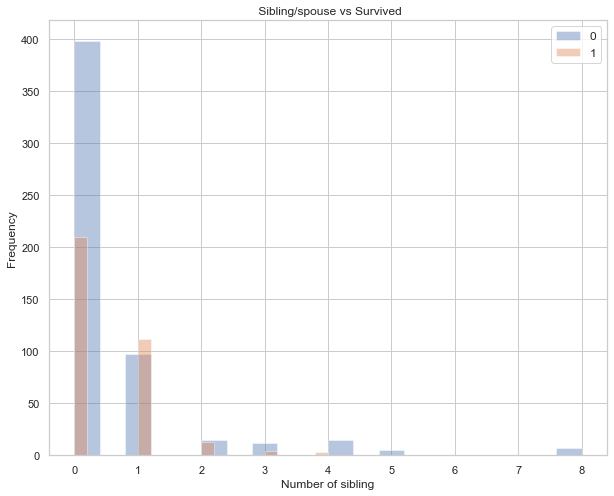

In [579]:
# sibling vs Survived
plt.figure(figsize=(10,8))
df = training_df[training_df['Survived']==0]
sns.distplot(df['SibSp'], bins=20,kde= False, label='0')
df = training_df[training_df['Survived']==1]
sns.distplot(df['SibSp'],bins=20, kde= False, label='1')
plt.legend(prop={'size': 12})
plt.title(" Sibling/spouse vs Survived")
plt.xlabel('Number of sibling')
plt.ylabel('Frequency')


Text(0, 0.5, 'Frequency')

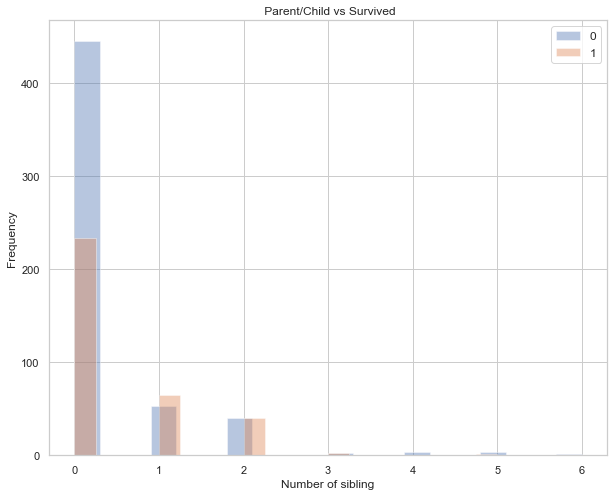

In [580]:
# parent/child vs Survived
plt.figure(figsize=(10,8))
df = training_df[training_df['Survived']==0]
sns.distplot(df['Parch'], bins=20,kde= False, label='0')
df = training_df[training_df['Survived']==1]
sns.distplot(df['Parch'],bins=20, kde= False, label='1')
plt.legend(prop={'size': 12})
plt.title(" Parent/Child vs Survived")
plt.xlabel('Number of sibling')
plt.ylabel('Frequency')


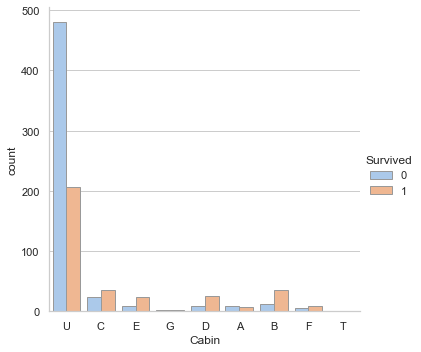

In [581]:
sns.catplot(x="Cabin", hue="Survived", kind="count",
            palette="pastel", edgecolor=".6",
            data=training_df)

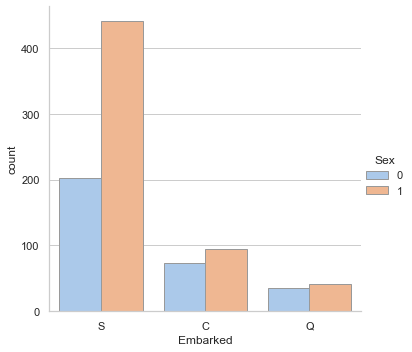

In [582]:
sns.catplot(x="Embarked", hue="Sex", kind="count",
            palette="pastel", edgecolor=".6",
            data=training_df)

In [583]:
training_df[training_df['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",0,38.0,0,0,113572,80.0,B,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",0,62.0,0,0,113572,80.0,B,NaN


In [584]:
training_df.groupby(["Sex",'Embarked'])["Sex"].count().reset_index(name= 'Count')

,Sex,Embarked,Count
0,0,C,73
1,0,Q,36
2,0,S,203
3,1,C,95
4,1,Q,41
5,1,S,441


In [585]:
ctc = pd.crosstab(index= training_df['Survived'], columns=[training_df['Embarked'],training_df['Cabin']])

In [586]:
round(ctc,2)

Embarked  C                        Q            S                           \
Cabin     A   B   C   D  E  F   U  C  E  F   U  A   B   C   D   E  F  G  T   
Survived                                                                     
0         3   5   7   2  0  0  58  1  0  1  45  5   7  16   6   8  4  2  1   
1         4  17  14  11  5  1  41  1  1  0  28  3  16  20  14  18  7  2  0   

Embarked       
Cabin       U  
Survived       
0         378  
1         137

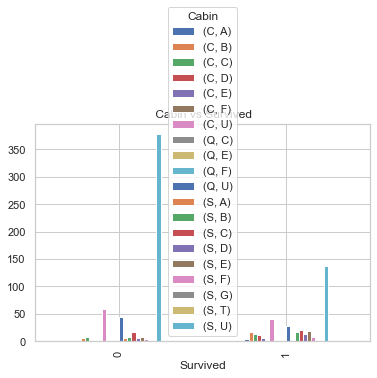

In [587]:
ctc.plot.bar(stacked=False)
plt.legend(title='Cabin')
plt.title(" Cabin vs Survived")
plt.show()

### Function - Cabin Assignment 
If passenger assigned to cabin "1" and "0" if passenger is not assigned

In [588]:
def cabin_assignment(dataset):
    dataset["Cabin A"]=np.where(dataset["Cabin"]=="A",1,0)
    dataset["Cabin B"]=np.where(dataset["Cabin"]=="B",1,0)
    dataset["Cabin C"]=np.where(dataset["Cabin"]=="C",1,0)
    dataset["Cabin D"]=np.where(dataset["Cabin"]=="D",1,0)
    dataset["Cabin E"]=np.where(dataset["Cabin"]=="E",1,0)
    dataset["Cabin F"]=np.where(dataset["Cabin"]=="F",1,0)
    dataset["Cabin G"]=np.where(dataset["Cabin"]=="G",1,0)
    dataset["Cabin T"]=np.where(dataset["Cabin"]=="T",1,0) 

In [589]:
cabin_assignment(training_df)
cabin_assignment(test_df)

In [590]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     889 non-null    object 
 12  Cabin A      891 non-null    int32  
 13  Cabin B      891 non-null    int32  
 14  Cabin C      891 non-null    int32  
 15  Cabin D      891 non-null    int32  
 16  Cabin E      891 non-null    int32  
 17  Cabin F      891 non-null    int32  
 18  Cabin G      891 non-null    int32  
 19  Cabin T 

In [591]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        418 non-null    object 
 10  Embarked     418 non-null    object 
 11  Cabin A      418 non-null    int32  
 12  Cabin B      418 non-null    int32  
 13  Cabin C      418 non-null    int32  
 14  Cabin D      418 non-null    int32  
 15  Cabin E      418 non-null    int32  
 16  Cabin F      418 non-null    int32  
 17  Cabin G      418 non-null    int32  
 18  Cabin T      418 non-null    int32  
dtypes: float

### Fix Missing Values Embarked

Embarked has 2 missing values in training dataset

In [592]:
training_df["Embarked"]=training_df["Embarked"].fillna("S")

In [593]:
training_df["Embarked"].isnull().sum()

0

### Function - Embarked Location 
If passenger embarked from location assigned "1" and "0" if passenger is did not embark from location 

In [594]:
def embark_assignment(dataset):
    dataset["Embarked S"]=np.where(dataset["Embarked"]=="S",1,0)
    dataset["Embarked C"]=np.where(dataset["Embarked"]=="C",1,0) 

NOTE: Embarked on Q is when the rest of embarked are 0

In [595]:
embark_assignment(training_df)
embark_assignment(test_df)

### Fix Missing Values Fare

In [596]:
test_df["Fare"]=test_df["Fare"].fillna(np.mean(test_df["Fare"]))

In [597]:
test_df["Fare"].isnull().sum()

0

### Feature Engineering - Family Size

<b>Family Size</b> = (SibSp and Parch)<br>
Total number of family members on board for each passenger

| Variable        | Description                        |  
| :---            |    :----:                          |
| sibsp 	      | Number of Siblings/Spouses Aboard  | 	 
| parch           | Number of Parents/Children Aboard  |

In [598]:
training_df["FamilySize"] = training_df["SibSp"] + training_df["Parch"] + 1
test_df["FamilySize"] = test_df["SibSp"] + test_df["Parch"] + 1

Text(0, 0.5, 'Frequency')

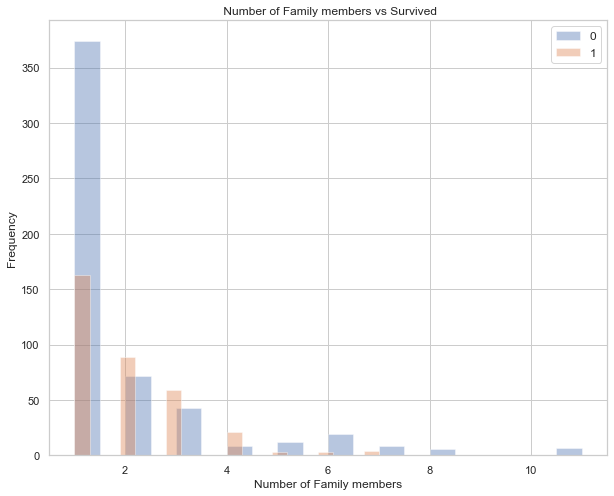

In [599]:
# Family size vs Survived
plt.figure(figsize=(10,8))
df = training_df[training_df['Survived']==0]
sns.distplot(df['FamilySize'], bins=20,kde= False, label='0')
df = training_df[training_df['Survived']==1]
sns.distplot(df['FamilySize'],bins=20, kde= False, label='1')
plt.legend(prop={'size': 12})
plt.title(" Number of Family members vs Survived")
plt.xlabel('Number of Family members')
plt.ylabel('Frequency')


# boxcox and min-max scaling

training_df['Age'] = training_df['Age'].transform(lambda x: st.boxcox(x)[0])
training_df['Fare']= training_df['Fare'].apply(lambda x: x+.01)
training_df['Fare']= training_df['Fare'].transform(lambda x: st.boxcox(x)[0])

training_df['Pclass']= training_df['Pclass'].transform(lambda x: st.boxcox(x)[0])
training_df['FamilySize']= training_df['FamilySize'].apply(lambda x: x+.01)
training_df['FamilySize']= training_df['FamilySize'].transform(lambda x: st.boxcox(x)[0])

training_df=training_df.apply(lambda x: x+.01)
training_df=training_df.transform(lambda x: st.boxcox(x)[0])

In [600]:
training_df['Age'] = training_df['Age'].transform(lambda x: (x - x.min()) / (x.max() - x.min()))
training_df['Fare']= training_df['Fare'].transform(lambda x: (x - x.min()) / (x.max() - x.min()))
training_df['Pclass'] = training_df['Pclass'].transform(lambda x: (x - x.min()) / (x.max() - x.min()))
training_df['FamilySize']= training_df['FamilySize'].transform(lambda x: (x - x.min()) / (x.max() - x.min()))

training_df=training_df.transform(lambda x: (x - x.min()) / (x.max() - x.min()))

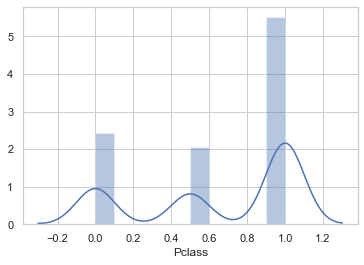

In [601]:
sns.distplot((training_df['Pclass']))

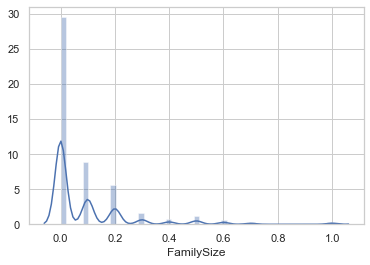

In [602]:
sns.distplot((training_df['FamilySize']))

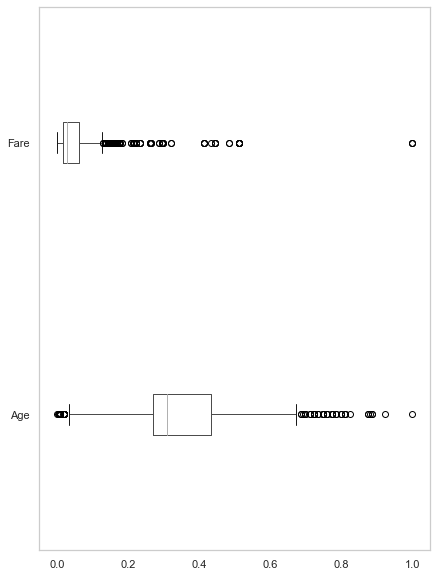

In [603]:
training_df[['Age','Fare']].boxplot(vert=False, figsize=(7,10), grid=False)

In [604]:
training_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Cabin B,Cabin C,Cabin D,Cabin E,Cabin F,Cabin G,Cabin T,Embarked S,Embarked C,FamilySize
0,1,0,1.0,"Braund, Mr. Owen Harris",1,0.271174,1,0,A/5 21171,0.014151,...,0,0,0,0,0,0,0,1,0,0.1
1,2,1,0.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0.472229,1,0,PC 17599,0.139136,...,0,1,0,0,0,0,0,0,1,0.1
2,3,1,1.0,"Heikkinen, Miss. Laina",0,0.321438,0,0,STON/O2. 3101282,0.015469,...,0,0,0,0,0,0,0,1,0,0.0
3,4,1,0.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.434531,1,0,113803,0.103644,...,0,1,0,0,0,0,0,1,0,0.1
4,5,0,1.0,"Allen, Mr. William Henry",1,0.434531,0,0,373450,0.015713,...,0,0,0,0,0,0,0,1,0,0.0


In [605]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    float64
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
 12  Cabin A      891 non-null    int32  
 13  Cabin B      891 non-null    int32  
 14  Cabin C      891 non-null    int32  
 15  Cabin D      891 non-null    int32  
 16  Cabin E      891 non-null    int32  
 17  Cabin F      891 non-null    int32  
 18  Cabin G      891 non-null    int32  
 19  Cabin T 

### Drop Columns from Preprocessing 

In [606]:
training_df.drop(["Name","Ticket","PassengerId","Embarked","Cabin","SibSp","Parch"],inplace=True,axis=1)
test_df.drop(["Name","Ticket","Embarked","Cabin","SibSp","Parch"],inplace=True,axis=1)

training_df=training_df.apply(lambda x: x+.01)
training_df=training_df.transform(lambda x: st.boxcox(x)[0])

training_df=training_df.transform(lambda x: (x - x.min()) / (x.max() - x.min()))

In [607]:
training_df.tail()

,Survived,Pclass,Sex,Age,Fare,Cabin A,Cabin B,Cabin C,Cabin D,Cabin E,Cabin F,Cabin G,Cabin T,Embarked S,Embarked C,FamilySize
886,0,0.5,1,0.334004,0.025374,0,0,0,0,0,0,0,0,1,0,0.0
887,1,0.0,0,0.233476,0.058556,0,1,0,0,0,0,0,0,1,0,0.0
888,0,1.0,0,0.308872,0.045771,0,0,0,0,0,0,0,0,1,0,0.3
889,1,0.0,1,0.321438,0.058556,0,0,1,0,0,0,0,0,0,1,0.0
890,0,1.0,1,0.396833,0.015127,0,0,0,0,0,0,0,0,0,0,0.0


## Model Development 

The Label = Survived, we removed the label from Training and Test Datasets

In [608]:
training_df1=training_df.copy()
test_df1=test_df.copy()

### Create Features and Label

In [609]:
x=training_df1.drop(["Survived"],axis=1)
y=training_df1["Survived"]

In [610]:
print(x.shape, y.shape)

(891, 15) (891,)


### Split Training Dataset 

In [611]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [612]:
print(x_train.shape, x_test.shape)

(712, 15) (179, 15)


In [613]:
x_train.head()

,Pclass,Sex,Age,Fare,Cabin A,Cabin B,Cabin C,Cabin D,Cabin E,Cabin F,Cabin G,Cabin T,Embarked S,Embarked C,FamilySize
140,1.0,0,0.308872,0.029758,0,0,0,0,0,0,0,0,0,1,0.2
439,0.5,1,0.384267,0.020495,0,0,0,0,0,0,0,0,1,0,0.0
817,0.5,1,0.384267,0.072227,0,0,0,0,0,0,0,0,0,1,0.2
378,1.0,1,0.246042,0.007832,0,0,0,0,0,0,0,0,0,1,0.0
491,1.0,1,0.258608,0.014151,0,0,0,0,0,0,0,0,1,0,0.0


<div class="alert alert-block alert-success">
    <b>K-Folds cross-validator</b>:Provides train/test indices to split data in train/test sets. Split dataset into k consecutive folds (without shuffling by default)<br>
Each fold is then used once as a validation while the k - 1 remaining folds form the training set
</div>

<div class="alert alert-block alert-info">
<b>sklearn.model_selection.KFold</b><br>
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html
</div>

In [614]:
k_fold = KFold(n_splits=5, shuffle=True, random_state=0)

### Functions - Support Model Performance Analysis 

In [615]:
def acc_score(model, x_test,y_test):
    return np.mean(cross_val_score(model,x_test,y_test,cv=k_fold,scoring="accuracy"))

In [616]:
def confusion_matrix_model(model_used, x_test,y_test):
    cm=confusion_matrix(y_test,model_used.predict(x_test))
    col=["Predicted Dead","Predicted Survived"]
    cm=pd.DataFrame(cm)
    cm.columns=["Predicted Dead","Predicted Survived"]
    cm.index=["Actual Dead","Actual Survived"]
    cm[col]=np.around(cm[col].div(cm[col].sum(axis=1),axis=0),decimals=2)
    return cm

In [617]:
def importance_of_features(model, x_train):
    features = pd.DataFrame()
    features['feature'] = x_train.columns
    features['importance'] = model.feature_importances_
    features.sort_values(by=['importance'], ascending=True, inplace=True)
    features.set_index('feature', inplace=True)
    return features.plot(kind='barh', figsize=(10,10))

In [618]:
def aucscore(model, x_test, y_test,has_proba=True):
    if has_proba:
        fpr,tpr,thresh=skplt.metrics.roc_curve(y_test,model.predict_proba(x_test)[:,1])
    else:
        fpr,tpr,thresh=skplt.metrics.roc_curve(y_test,model.decision_function(x_test))
    x=fpr
    y=tpr
    auc= skplt.metrics.auc(x,y)
    return auc
def plt_roc_curve(name,model, x_test,y_test,has_proba=True):
    if has_proba:
        fpr,tpr,thresh=skplt.metrics.roc_curve(y_test,model.predict_proba(x_test)[:,1])
    else:
        fpr,tpr,thresh=skplt.metrics.roc_curve(y_test,model.decision_function(x_test))
    x=fpr
    y=tpr
    auc= skplt.metrics.auc(x,y)
    plt.plot(x,y,label='ROC curve for %s (AUC = %0.2f)' % (name, auc))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim((0,1))
    plt.ylim((0,1))
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    plt.show()

In [619]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [620]:
training_df.iloc[:,1:]

,Pclass,Sex,Age,Fare,Cabin A,Cabin B,Cabin C,Cabin D,Cabin E,Cabin F,Cabin G,Cabin T,Embarked S,Embarked C,FamilySize
0,1.0,1,0.271174,0.014151,0,0,0,0,0,0,0,0,1,0,0.1
1,0.0,0,0.472229,0.139136,0,0,1,0,0,0,0,0,0,1,0.1
2,1.0,0,0.321438,0.015469,0,0,0,0,0,0,0,0,1,0,0.0
3,0.0,0,0.434531,0.103644,0,0,1,0,0,0,0,0,1,0,0.1
4,1.0,1,0.434531,0.015713,0,0,0,0,0,0,0,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.5,1,0.334004,0.025374,0,0,0,0,0,0,0,0,1,0,0.0
887,0.0,0,0.233476,0.058556,0,1,0,0,0,0,0,0,1,0,0.0
888,1.0,0,0.308872,0.045771,0,0,0,0,0,0,0,0,1,0,0.3
889,0.0,1,0.321438,0.058556,0,0,1,0,0,0,0,0,0,1,0.0


In [621]:
X = training_df.iloc[:,1:]  #independent columns
y = training_df.iloc[:,0:1]    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=6)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

         Specs      Score
1          Sex  92.702447
0       Pclass  27.232933
5      Cabin B  25.875581
13  Embarked C  20.464401
7      Cabin D  19.489646
8      Cabin E  18.140638
6      Cabin C  10.936730
3         Fare   8.819172
12  Embarked S   5.489205
9      Cabin F   2.946970


[0.088434   0.27964461 0.24197018 0.22443173 0.00401647 0.01245423
 0.00795118 0.01249385 0.01787484 0.00468922 0.00192348 0.0006228
 0.01489335 0.014547   0.07405304]


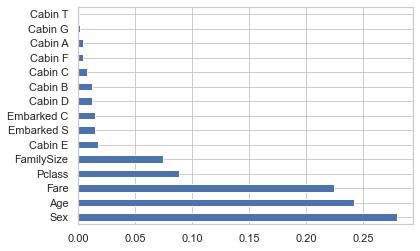

In [622]:

X = training_df.iloc[:,1:]  #independent columns
y = training_df.iloc[:,0:1]    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(16).plot(kind='barh')
plt.show()

In [623]:
x_train

,Pclass,Sex,Age,Fare,Cabin A,Cabin B,Cabin C,Cabin D,Cabin E,Cabin F,Cabin G,Cabin T,Embarked S,Embarked C,FamilySize
140,1.0,0,0.308872,0.029758,0,0,0,0,0,0,0,0,0,1,0.2
439,0.5,1,0.384267,0.020495,0,0,0,0,0,0,0,0,1,0,0.0
817,0.5,1,0.384267,0.072227,0,0,0,0,0,0,0,0,0,1,0.2
378,1.0,1,0.246042,0.007832,0,0,0,0,0,0,0,0,0,1,0.0
491,1.0,1,0.258608,0.014151,0,0,0,0,0,0,0,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,0.0,0,0.484795,0.162314,0,0,0,0,1,0,0,0,0,1,0.2
192,1.0,0,0.233476,0.015330,0,0,0,0,0,0,0,0,1,0,0.1
629,1.0,1,0.308872,0.015094,0,0,0,0,0,0,0,0,0,0,0.0
559,1.0,0,0.447097,0.033963,0,0,0,0,0,0,0,0,1,0,0.1


# Create Logistic Regression Model

<div class="alert alert-block alert-success">
    <b>Logistic Regression</b>: In the multiclass case, the training algorithm uses the one-vs-rest (OvR) scheme if the ‘multi_class’ option is set to ‘ovr’, and uses the cross-entropy loss if the ‘multi_class’ option is set to ‘multinomial’
</div>

<div class="alert alert-block alert-info">
<b>sklearn.linear_model.LogisticRegression</b><br>
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
</div>

In [624]:
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)

print("Accuracy: " + str(acc_score(log_reg,x_test= x_train, y_test= y_train)))
confusion_matrix_model(log_reg,x_test= x_train, y_test= y_train)

Accuracy: 0.7935979513444302


,Predicted Dead,Predicted Survived
Actual Dead,0.85,0.15
Actual Survived,0.29,0.71


In [625]:
preds = np.where(log_reg.predict_proba(x_train)[:,1] > 0.55, 1, 0)

In [626]:
print(classification_report(y_train, preds))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       439
           1       0.79      0.69      0.74       273

    accuracy                           0.81       712
   macro avg       0.81      0.79      0.80       712
weighted avg       0.81      0.81      0.81       712



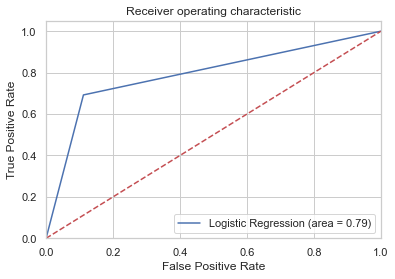

In [627]:
logit_roc_auc = roc_auc_score(y_train, preds)
fpr, tpr, thresholds = roc_curve(y_train, preds)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [628]:
print(log_reg.coef_)

[[-1.6696145  -2.51302151 -2.1370189   0.56786685  0.25773991  0.20372611
  -0.26103434  0.50392596  1.17361218  0.80805185  0.01662876 -0.24454108
  -0.36161555  0.03115022 -1.28660895]]


In [629]:
x =(log_reg.intercept_.round(2) , log_reg.coef_.round(3))

In [630]:
x

(array([3.15]),
 array([[-1.67 , -2.513, -2.137,  0.568,  0.258,  0.204, -0.261,  0.504,
          1.174,  0.808,  0.017, -0.245, -0.362,  0.031, -1.287]]))

In [631]:
for i in x :
    print (i)

[3.15]
[[-1.67  -2.513 -2.137  0.568  0.258  0.204 -0.261  0.504  1.174  0.808
   0.017 -0.245 -0.362  0.031 -1.287]]


In [632]:
training_df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Cabin A', 'Cabin B',
       'Cabin C', 'Cabin D', 'Cabin E', 'Cabin F', 'Cabin G', 'Cabin T',
       'Embarked S', 'Embarked C', 'FamilySize'],
      dtype='object')

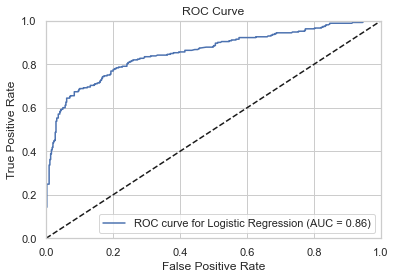

In [633]:
plt_roc_curve("Logistic Regression",log_reg,x_test= x_train, y_test=y_train,has_proba=True)

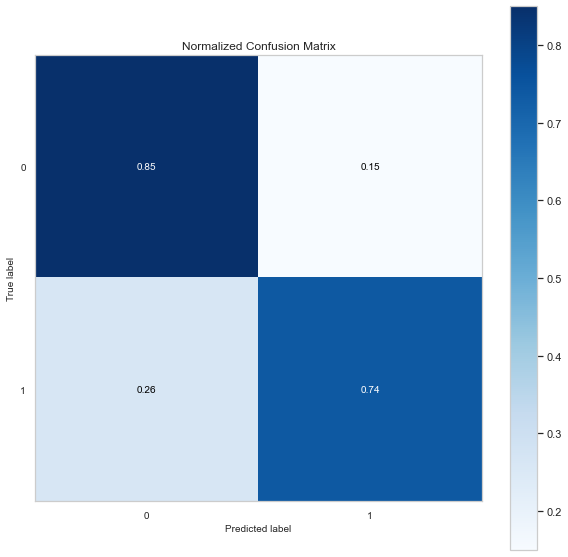

In [634]:
skplt.metrics.plot_confusion_matrix(y_test, log_reg.predict(x_test),normalize=True, figsize=(10,10))

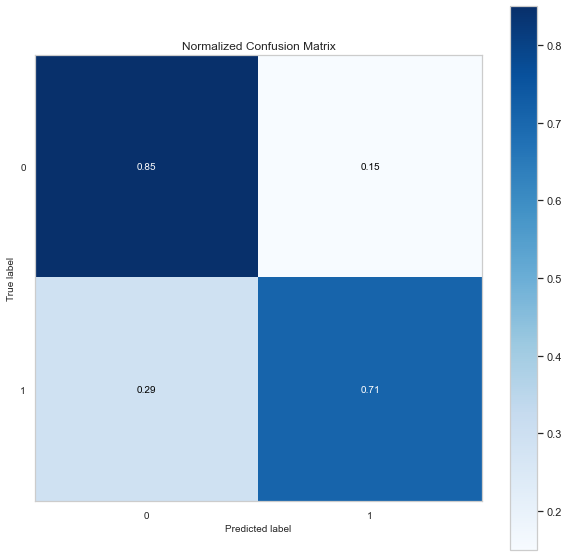

In [635]:
skplt.metrics.plot_confusion_matrix(y_train, log_reg.predict(x_train),normalize=True, figsize=(10,10))

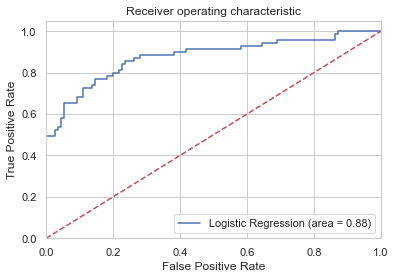

In [636]:
logit_roc_auc = roc_auc_score(y_test, log_reg.predict_proba(x_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

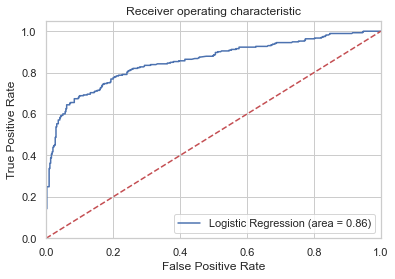

In [637]:
logit_roc_auc =roc_auc_score(y_train, log_reg.predict_proba(x_train)[:,1])
fpr, tpr, thresholds = roc_curve(y_train, log_reg.predict_proba(x_train)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


Area Under Curve: 0.79


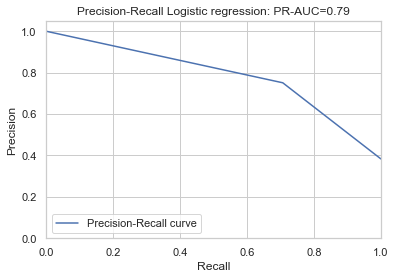

In [638]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
precision, recall, thresholds = precision_recall_curve(y_train, log_reg.predict(x_train))
area = auc(recall, precision)
print ("Area Under Curve: %0.2f" % area)

plt.clf()
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Logistic regression: PR-AUC=%0.2f' % area)
plt.legend(loc="lower left")
plt.show()

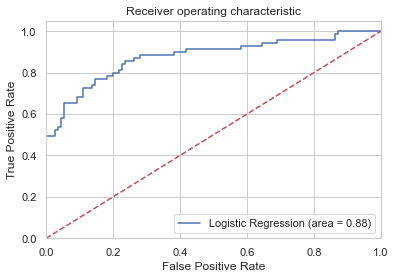

In [639]:
logit_roc_auc =roc_auc_score(y_test, log_reg.predict_proba(x_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


Area Under Curve: 0.80


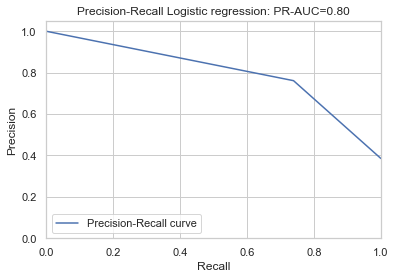

In [640]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
precision, recall, thresholds = precision_recall_curve(y_test, log_reg.predict(x_test))
area = auc(recall, precision)
print ("Area Under Curve: %0.2f" % area)

plt.clf()
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Logistic regression: PR-AUC=%0.2f' % area)
plt.legend(loc="lower left")
plt.show()

In [641]:
print(classification_report(y_train, log_reg.predict(x_train)))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84       439
           1       0.75      0.71      0.73       273

    accuracy                           0.80       712
   macro avg       0.79      0.78      0.78       712
weighted avg       0.80      0.80      0.80       712



In [642]:
print(classification_report(y_test, log_reg.predict(x_test)))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85       110
           1       0.76      0.74      0.75        69

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



### Create Support Vector Machine

<div class="alert alert-block alert-success">
<b>Support Vector Machines</b><br>
The advantages of support vector machines are:<br>
1. Effective in high dimensional spaces<br>
2. Still effective in cases where number of dimensions is greater than the number of samples<br>
3. Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient<br>
4. Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels<br>
</div>

<div class="alert alert-block alert-info">
<b>Support Vector Machines</b><br>
https://scikit-learn.org/stable/modules/svm.html
</div>

In [643]:
SVC_rbf=SVC(kernel="rbf")
SVC_rbf.fit(x_train,y_train)

print("Accuracy: " + str(acc_score(SVC_rbf, x_test= x_train, y_test= y_train)))
confusion_matrix_model(SVC_rbf,x_test= x_train, y_test= y_train)

Accuracy: 0.8090318132571653


,Predicted Dead,Predicted Survived
Actual Dead,0.94,0.06
Actual Survived,0.37,0.63


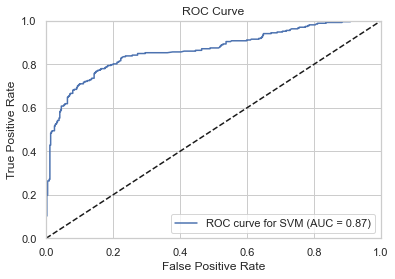

In [644]:
plt_roc_curve("SVM",SVC_rbf,x_test= x_train, y_test= y_train,has_proba=False)

Area Under Curve: 0.81


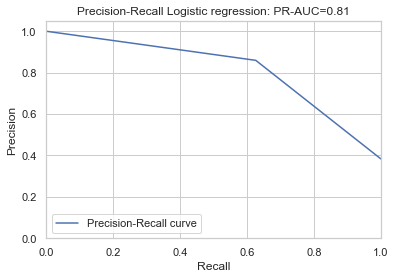

In [645]:
precision, recall, thresholds = precision_recall_curve(y_train, SVC_rbf.predict(x_train))
area = auc(recall, precision)
print ("Area Under Curve: %0.2f" % area)

plt.clf()
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Logistic regression: PR-AUC=%0.2f' % area)
plt.legend(loc="lower left")
plt.show()

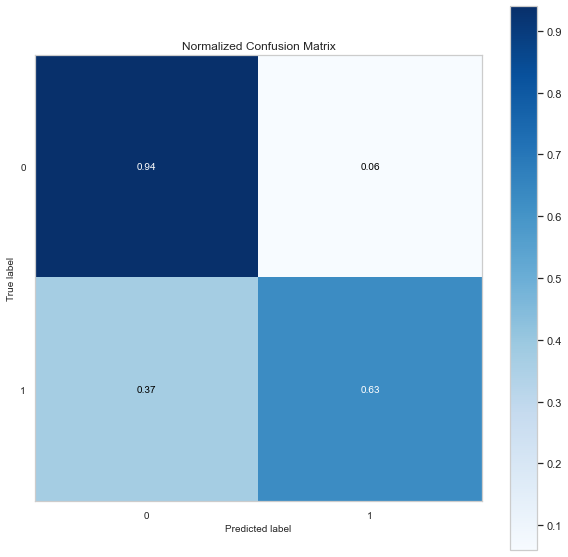

In [646]:
skplt.metrics.plot_confusion_matrix(y_train, SVC_rbf.predict(x_train),normalize=True, figsize=(10,10))

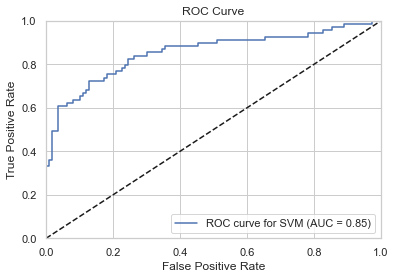

In [647]:
plt_roc_curve("SVM",SVC_rbf,x_test= x_test, y_test= y_test,has_proba=False)

Area Under Curve: 0.81


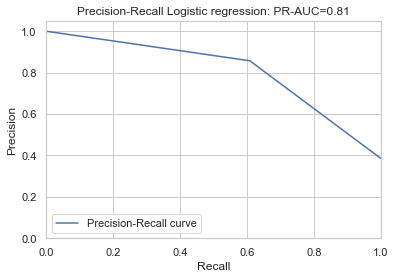

In [648]:
precision, recall, thresholds = precision_recall_curve(y_test, SVC_rbf.predict(x_test))
area = auc(recall, precision)
print ("Area Under Curve: %0.2f" % area)

plt.clf()
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Logistic regression: PR-AUC=%0.2f' % area)
plt.legend(loc="lower left")
plt.show()

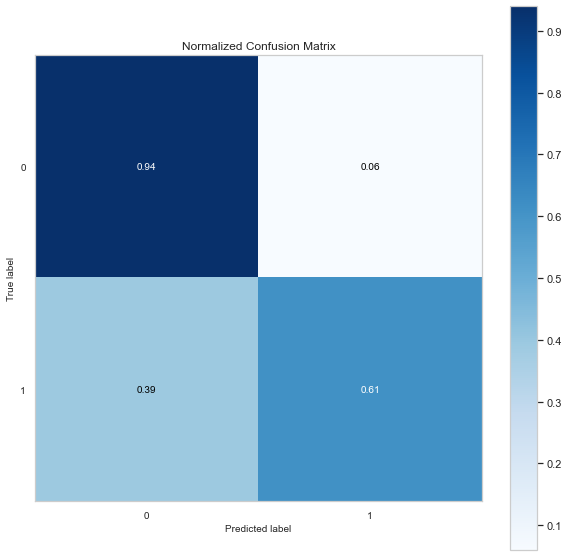

In [649]:
skplt.metrics.plot_confusion_matrix(y_test, SVC_rbf.predict(x_test),normalize=True, figsize=(10,10))

In [650]:
print(classification_report(y_train, SVC_rbf.predict(x_train)))

              precision    recall  f1-score   support

           0       0.80      0.94      0.86       439
           1       0.86      0.63      0.72       273

    accuracy                           0.82       712
   macro avg       0.83      0.78      0.79       712
weighted avg       0.82      0.82      0.81       712



In [651]:
print(classification_report(y_test, SVC_rbf.predict(x_test)))

              precision    recall  f1-score   support

           0       0.79      0.94      0.86       110
           1       0.86      0.61      0.71        69

    accuracy                           0.81       179
   macro avg       0.82      0.77      0.79       179
weighted avg       0.82      0.81      0.80       179



In [652]:
print("Accuracy: " + str(acc_score(SVC_rbf, x_test= x_test, y_test= y_test)))
confusion_matrix_model(SVC_rbf,x_test= x_test, y_test= y_test)

Accuracy: 0.7934920634920635


,Predicted Dead,Predicted Survived
Actual Dead,0.94,0.06
Actual Survived,0.39,0.61


In [653]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

clf = RandomForestClassifier()
clf.fit(x_train, y_train)


RandomForestClassifier()

In [654]:
print("Accuracy: " + str(acc_score(clf, x_test= x_train, y_test= y_train)))
confusion_matrix_model(clf,x_test= x_train, y_test= y_train)

Accuracy: 0.7908302964640992


,Predicted Dead,Predicted Survived
Actual Dead,1.00,0.00
Actual Survived,0.03,0.97


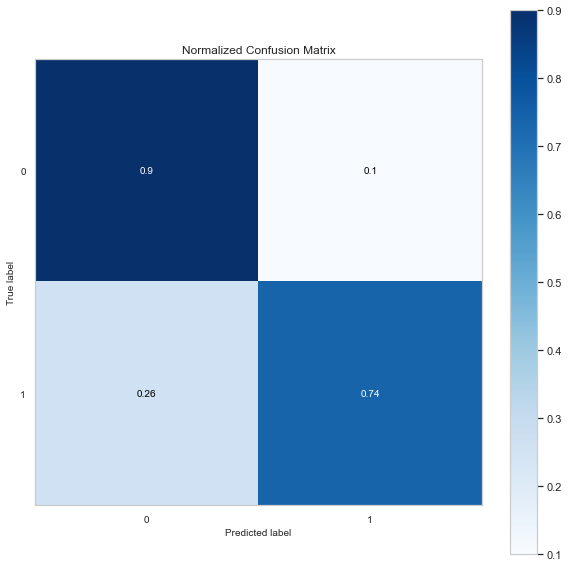

In [655]:
skplt.metrics.plot_confusion_matrix(y_test, clf.predict(x_test),normalize=True, figsize=(10,10))

In [658]:
print(classification_report(y_test, clf.predict(x_test)))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       110
           1       0.82      0.74      0.78        69

    accuracy                           0.84       179
   macro avg       0.83      0.82      0.83       179
weighted avg       0.84      0.84      0.84       179



In [659]:
print(classification_report(y_train, clf.predict(x_train)))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       439
           1       0.99      0.97      0.98       273

    accuracy                           0.99       712
   macro avg       0.99      0.98      0.99       712
weighted avg       0.99      0.99      0.99       712



### Create K-Nearest Neighbour

<div class="alert alert-block alert-success">
    <b>Nearest Neighbors</b>: provides functionality for unsupervised and supervised neighbors-based learning methods. Unsupervised nearest neighbors is the foundation of many other learning methods, notably manifold learning and spectral clustering. Supervised neighbors-based learning comes in two flavors: classification for data with discrete labels, and regression for data with continuous labels
</div>

<div class="alert alert-block alert-info">
<b>Nearest Neighbors</b><br>
https://scikit-learn.org/stable/modules/neighbors.html
</div>

In [2343]:
KNN=KNeighborsClassifier(n_neighbors=5)
KNN.fit(x_train,y_train)

print("Accuracy: " + str(acc_score(KNN,x_test= x_train, y_test= y_train)))
confusion_matrix_model(KNN,x_test= x_train, y_test= y_train)

Accuracy: 0.7935881020388063


,Predicted Dead,Predicted Survived
Actual Dead,0.93,0.07
Actual Survived,0.28,0.72


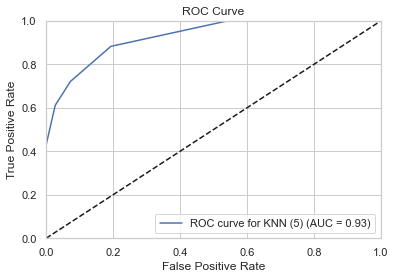

In [2344]:
plt_roc_curve("KNN (5)",KNN,x_test= x_train, y_test= y_train,has_proba=True)

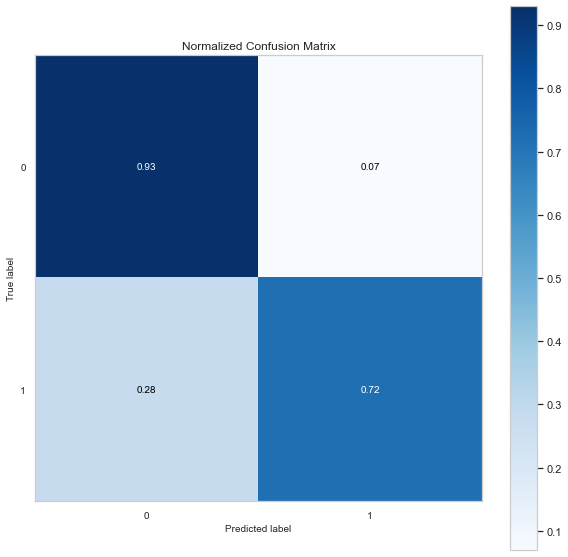

In [2345]:
skplt.metrics.plot_confusion_matrix(y_train, KNN.predict(x_train),normalize=True, figsize=(10,10))

Area Under Curve: 0.84


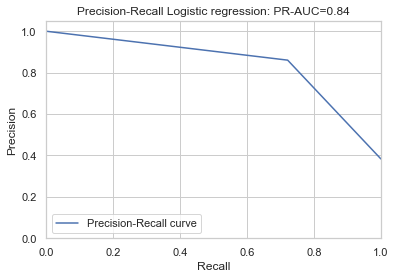

In [2346]:
precision, recall, thresholds = precision_recall_curve(y_train, KNN.predict(x_train))
area = auc(recall, precision)
print ("Area Under Curve: %0.2f" % area)

plt.clf()
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Logistic regression: PR-AUC=%0.2f' % area)
plt.legend(loc="lower left")
plt.show()

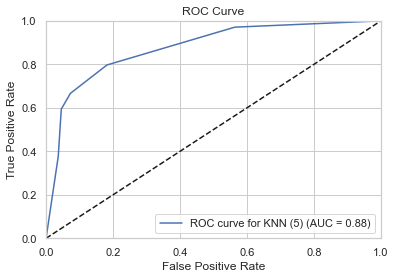

In [2347]:
plt_roc_curve("KNN (5)",KNN,x_test= x_test, y_test= y_test,has_proba=True)

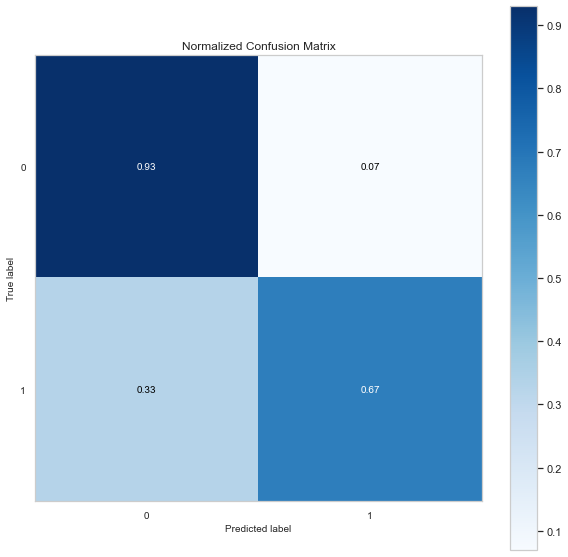

In [2348]:
skplt.metrics.plot_confusion_matrix(y_test, KNN.predict(x_test),normalize=True, figsize=(10,10))

Area Under Curve: 0.82


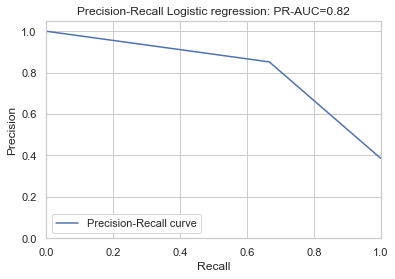

In [2349]:
precision, recall, thresholds = precision_recall_curve(y_test, KNN.predict(x_test))
area = auc(recall, precision)
print ("Area Under Curve: %0.2f" % area)

plt.clf()
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Logistic regression: PR-AUC=%0.2f' % area)
plt.legend(loc="lower left")
plt.show()

In [2350]:
print(classification_report(y_train, KNN.predict(x_train)))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88       439
           1       0.86      0.72      0.78       273

    accuracy                           0.85       712
   macro avg       0.85      0.82      0.83       712
weighted avg       0.85      0.85      0.85       712



In [2351]:
print(classification_report(y_test, KNN.predict(x_test)))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       110
           1       0.85      0.67      0.75        69

    accuracy                           0.83       179
   macro avg       0.83      0.80      0.81       179
weighted avg       0.83      0.83      0.82       179



### Summary Statistics - Logistic Regression / SVM / K-Nearest Neighbours

In [2336]:
# train data score 

In [2339]:
Classifiers=["Logistic Regression","Support Vector Machine","K-Nearest Neighbours"]
Acc=[acc_score(x,x_test=x_train,y_test=y_train) for x in [log_reg,SVC_rbf,KNN]]
auc_scores_prob=[aucscore(x,x_test= x_train, y_test= y_train,has_proba=True) for x in [log_reg,KNN]]
auc_scores_noprob=[aucscore(x,x_test= x_train, y_test= y_train,has_proba=False) for x in [SVC_rbf]]
auc_scores=auc_scores_prob[:3] + auc_scores_noprob + auc_scores_prob[3:]
cols=["Classifier","Accuracy","AUC"]
results = pd.DataFrame(columns=cols)
results["Classifier"]=Classifiers
results["Accuracy"]=Acc
results["AUC"]=auc_scores
results


,Classifier,Accuracy,AUC
0,Logistic Regression,0.785177,0.853576
1,Support Vector Machine,0.804826,0.927391
2,K-Nearest Neighbours,0.793588,0.869830


In [2341]:
# result on train with logistic not transofrmed 
result_t.iloc[1:] = results.iloc[1:]

In [2342]:
result_t

,Classifier,Accuracy,AUC
0,Logistic Regression,0.796405,0.857281
1,Support Vector Machine,0.804826,0.927391
2,K-Nearest Neighbours,0.793588,0.869830


In [2141]:
# test data score 

In [2338]:
Classifiers=["Logistic Regression","Support Vector Machine","K-Nearest Neighbours"]
Acc=[acc_score(x,x_test= x_test, y_test= y_test) for x in [log_reg,SVC_rbf,KNN]]
auc_scores_prob=[aucscore(x,x_test= x_test, y_test= y_test,has_proba=True) for x in [log_reg,KNN]]
auc_scores_noprob=[aucscore(x,x_test= x_test, y_test= y_test,has_proba=False) for x in [SVC_rbf]]
auc_scores=auc_scores_prob[:3] + auc_scores_noprob + auc_scores_prob[3:]
cols=["Classifier","Accuracy","AUC"]
results = pd.DataFrame(columns=cols)
results["Classifier"]=Classifiers
results["Accuracy"]=Acc
results["AUC"]=auc_scores
results

,Classifier,Accuracy,AUC
0,Logistic Regression,0.809841,0.875494
1,Support Vector Machine,0.793333,0.875889
2,K-Nearest Neighbours,0.798889,0.856258


In [2014]:
## result on train data with log not tranformed
result_tt

,Classifier,Accuracy,AUC
0,Logistic Regression,0.770476,0.871542
1,Support Vector Machine,0.793333,0.875889
2,K-Nearest Neighbours,0.798889,0.856258


In [1279]:
from sklearn.metrics import precision_recall_fscore_support

precision_recall_fscore_support(y_test, log_reg.predict(x_test), average='binary')

(0.71875, 0.696969696969697, 0.7076923076923077, None)

#### Tuning Parameters with GridSearchCV

<div class="alert alert-block alert-info">
<b>sklearn.model_selection.GridSearchCV</b><br>
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
</div>

#### HyperParameter Search 

<div class="alert alert-block alert-info">
<b>sklearn.linear_model.LogisticRegression</b><br>
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
</div>

In [1280]:
parameters = {"class_weight": ["None", "balanced"], 
              "max_iter": [25,50,75,100],
              "penalty": ["l1", "l2", "elasticnet", "none"], 
              "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
             }

In [1281]:
parameters

{'class_weight': ['None', 'balanced'],
 'max_iter': [25, 50, 75, 100],
 'penalty': ['l1', 'l2', 'elasticnet', 'none'],
 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

In [1282]:
grid_cv = GridSearchCV(log_reg, parameters, scoring = make_scorer(accuracy_score))
grid_cv = grid_cv.fit(x_train, y_train)

In [1283]:
print("Our optimized Logistic Regression model is:")
grid_cv.best_estimator_

Our optimized Logistic Regression model is:


LogisticRegression(class_weight='None', max_iter=25, penalty='none',
                   solver='sag')

# SVM hyper paratmer tuning 

In [1285]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(x_train, y_train) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.770, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.783, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.825, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.775, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.812, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.801, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.613, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.613, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.615, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.615, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.619, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.613, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.613, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] .

[CV] .......... C=100, gamma=1, kernel=rbf, score=0.825, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .......... C=100, gamma=1, kernel=rbf, score=0.831, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .......... C=100, gamma=1, kernel=rbf, score=0.794, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=100, gamma=0.1, kernel=rbf, score=0.764, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=100, gamma=0.1, kernel=rbf, score=0.789, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=100, gamma=0.1, kernel=rbf, score=0.856, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=100, gamma=0.1, kernel=rbf, score=0.819, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    1.5s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [1286]:

# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_)

{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=1000, gamma=0.1)


In [1287]:
from sklearn.metrics import classification_report
grid_predictions = grid.predict(x_test) 
  
# print classification report 
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

         0.0       0.79      0.89      0.84        56
         1.0       0.77      0.61      0.68        33

    accuracy                           0.79        89
   macro avg       0.78      0.75      0.76        89
weighted avg       0.78      0.79      0.78        89



In [2168]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2,3]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(x_train,y_train)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 2
Best n_neighbors: 3


#### Build Logistic Regression Model with Parameter Tuning

In [1289]:
logreg_clf_GSCV = LogisticRegression(C=1.0, class_weight='None', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=50,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
logreg_clf_GSCV.fit(x_train, y_train)

LogisticRegression(class_weight='None', max_iter=50, penalty='none')

In [1290]:
print("Accuracy: " + str(acc_score(logreg_clf_GSCV, x_test= x_train, y_test= y_train)))
confusion_matrix_model(logreg_clf_GSCV, x_test= x_train, y_test= y_train)

Accuracy: 0.7880978260869567


,Predicted Dead,Predicted Survived
Actual Dead,0.85,0.15
Actual Survived,0.27,0.73


parameters = [{'C': [1, 10, 100, 1000], 
              'kernel': ('linear', 'poly', 'rbf', 'sigmoid'),
              'gamma': ('scale', 'auto'),
               'coef0' : [0,0.001,0.005, 1,2,4,5,10],
               
              }]

grid_cv = GridSearchCV(SVC_rbf, parameters, scoring = make_scorer(accuracy_score))
grid_cv = grid_cv.fit(x_train, y_train)

print("Our optimized Logistic Regression model is:")
grid_cv.best_estimator_

SVM_grid = SVC(C=10, gamma=0.1)
SVM_grid .fit(x_train, y_train)

print("Accuracy: " + str(acc_score(SVM_grid)))
confusion_matrix_model(SVM_grid)

In [1291]:
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Cabin A,Cabin B,Cabin C,Cabin D,Cabin E,Cabin F,Cabin G,Cabin T,Embarked S,Embarked C,FamilySize
0,892,3,1,34.5,7.8292,0,0,0,0,0,0,0,0,0,0,1
1,893,3,0,47.0,7.0000,0,0,0,0,0,0,0,0,1,0,2
2,894,2,1,62.0,9.6875,0,0,0,0,0,0,0,0,0,0,1
3,895,3,1,27.0,8.6625,0,0,0,0,0,0,0,0,1,0,1
4,896,3,0,22.0,12.2875,0,0,0,0,0,0,0,0,1,0,3


In [1292]:
kfold()

NameError: name 'kfold' is not defined

In [2366]:
# Seed value for random number generators to obtain reproducible results
RANDOM_SEED = 1

# The model input data outside of the modeling method calls
names = ['Logistic', 'SVM', 'KNN']

# Specify the set of regression models being evaluated (we set normalize=False because we have standardized above)
regressors = [LogisticRegression(max_iter=75), 
              SVC(kernel="rbf"),
              KNeighborsClassifier(n_neighbors=5)
         
              ]

In [2367]:
model_data= training_df.values

In [2368]:
# Establish number of cross folds employed for cross-validation
N_FOLDS = 10

# Setup numpy array for storing results
cv_results = np.zeros((N_FOLDS, len(names)))
cv_r2 =np.zeros((N_FOLDS, len(names)))
# Initiate splitting process
kf = KFold(n_splits = N_FOLDS, shuffle=False, random_state = RANDOM_SEED)

# Check the splitting process by looking at fold observation counts
index_for_fold = 0  # Fold count initialized 
for train_index, test_index in kf.split(model_data):
    print('\nFold index:', index_for_fold, '---------------------------------------------------------------------------------------')

# The structure of modeling data for this study has the response variable coming first and explanatory variables later          
# so 1:model_data.shape[1] slices for explanatory variables and 0 is the index for the response variable    
    x_train = model_data[train_index, 1:model_data.shape[1]]
    x_test = model_data[test_index, 1:model_data.shape[1]]
    y_train = model_data[train_index, 0]
    y_test = model_data[test_index, 0]   

    index_for_method = 0  # Method count initialized
    #index_r = 0
    for name, reg_model in zip(names, regressors):
        reg_model.fit(x_train, y_train)  # Fit on the train set for this fold
 
        # Evaluate on the test set for this fold
        y_test_predict = reg_model.predict(x_test)
        fold_method_result = accuracy_score(y_test, y_test_predict)
        #R_squared = reg_model.score(X_test,y_test)
        cv_results[index_for_fold, index_for_method] = fold_method_result
        
        #cv_r2[index_r, index_for_method]= R_squared
        index_for_method += 1
        #index_r += 1
  
    index_for_fold += 1

cv_results_df = pd.DataFrame(cv_results)
cv_results_df.columns = names
cv_r2df= pd.DataFrame(cv_r2)
cv_r2df.columns = names
print('\n---------------------------------------------------------------------------------------')
print('Average results from ', N_FOLDS, '-fold cross-validation\n',      'in standardized units (mean 0, standard deviation 1)\n', '\nMethod    accuracy score', sep = '')    
print(cv_results_df.mean())
print(cv_results_df)


Fold index: 0 ---------------------------------------------------------------------------------------

Fold index: 1 ---------------------------------------------------------------------------------------

Fold index: 2 ---------------------------------------------------------------------------------------

Fold index: 3 ---------------------------------------------------------------------------------------

Fold index: 4 ---------------------------------------------------------------------------------------

Fold index: 5 ---------------------------------------------------------------------------------------

Fold index: 6 ---------------------------------------------------------------------------------------

Fold index: 7 ---------------------------------------------------------------------------------------

Fold index: 8 ---------------------------------------------------------------------------------------

Fold index: 9 ----------------------------------------------------------

In [ ]:
model_data

In [ ]:
kf = KFold(n_splits = N_FOLDS, shuffle=False, random_state = RANDOM_SEED)
for train_index, test_index in kf.split(model_data):
  print (train_index)

In [2352]:
training_df1["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [2358]:
y_train.value_counts()

0    439
1    273
Name: Survived, dtype: int64

In [2364]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(KNN, x_train, y_train, cv=10)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.70833333 0.75       0.81690141 0.81690141 0.8028169  0.76056338
 0.76056338 0.8028169  0.78873239 0.8028169 ]


In [2365]:
scores.mean()

0.7810446009389672

In [2490]:
training_d

,Survived,Pclass,Sex,Age,Fare,Cabin A,Cabin B,Cabin C,Cabin D,Cabin E,Cabin F,Cabin G,Cabin T,Embarked S,Embarked C,FamilySize
0,0,3,1,22.0,7.2500,0,0,0,0,0,0,0,0,1,0,2
1,1,1,0,38.0,71.2833,0,0,1,0,0,0,0,0,0,1,2
2,1,3,0,26.0,7.9250,0,0,0,0,0,0,0,0,1,0,1
3,1,1,0,35.0,53.1000,0,0,1,0,0,0,0,0,1,0,2
4,0,3,1,35.0,8.0500,0,0,0,0,0,0,0,0,1,0,1


In [2488]:
x_train['Pclass'].value_counts()

3    396
1    170
2    146
Name: Pclass, dtype: int64